In [183]:
import random
import math
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import copy
from statistics import mean
import matplotlib.pyplot as plt

In [184]:
Operators = ["+", '-', '*', '/' , "sin" , "cos"]
Values = list (range(1,11))
variable = ['x']

In [185]:
def function(x):
    # return 2 * (x**2) + 3 * x + 1
    return 2*x

In [186]:
X_train = np.random.randint(1, 100, size=(20, 1))
y_train = function(X_train[:,0])
len(X_train)
y_train


array([ 98, 148, 132, 196, 170,  44,  94, 104,  74, 172,  66, 136, 152,
       182,  78, 168,  74, 122, 166,  60])

In [187]:
class Node() :
    def __init__(self , operator , children) :
        self.operator = operator
        self.children = children
        self.isLeaf= False
        self.value = 0


In [188]:
class Tree () :
    def __init__(self , max_depth = 6) :
        self.max_depth = max_depth
        self.root = None
    def createFromRoot (self , node):
        self.root = node

    def returnRoot (self):
        node = self.root
        return node

    def create (self):
        self.root  = self.grow()
    
    def printTree (self , node = None):
        if (node == None):
            print(self.to_math_string(self.root))
        else:
            print(self.to_math_string(node))
        

    def grow (self , depth = 0 ):

        temp_op = random.choice(Operators)
        temp_rand = random.randint(0 , 10)

        if (depth == self.max_depth or temp_rand > 7):
            if (temp_op == "sin" or temp_op == "cos"):
                temp_node = Node (operator=temp_op, children=["x"])
                temp_node.isLeaf = True
                return temp_node
            else :
                child = random.choice(Values)
                temp_node = Node (operator= temp_op , children=["x",child])
                temp_node.isLeaf = True
                return temp_node
        
        else:
            if (temp_op == "sin" or temp_op == "cos"):
                child = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[child])
                return temp_node
            else :
                left_node  = self.grow ( depth= depth + 1 )
                right_node = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[left_node,right_node])
                return temp_node
    
    def to_math_string(self , node):
        if isinstance ( node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    return f"{node.operator}({node.children[0]})"
                else:
                    return f"({node.children[0]} {node.operator} {node.children[1]})"
            else:
                if len(node.children) == 1:
                    return f"{node.operator}({self.to_math_string(node.children[0])})"
                else:
                    return f"({self.to_math_string(node.children[0])} {node.operator} {self.to_math_string(node.children[1])})"
            
    
    def calculate (self , val):
        return self.calculator ( self.root , val)


    def calculator (self , node , val):
        if isinstance (node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    node.value = self.SinCosOp (node , val)
                    # return node.value
                else :
                    node.value = self.OtherOp (node , val , node.children[1])
                    # return node.value
            else:
                if len(node.children) == 1:
                    temp_val = self.calculator(node.children[0] , val)
                    node.value = self.SinCosOp (node , temp_val)
                else :
                    temp_val1 = self.calculator(node.children[0], val)
                    temp_val2 = self.calculator(node.children[1], val)
                    node.value = self.OtherOp (node , temp_val1 , temp_val2)
            return node.value
            


    def SinCosOp (self , node , val):
        if (node.operator == "sin"):
            return np.sin(val)
        if (node.operator == "cos"):
            return np.cos(val)
        
    def OtherOp (self , node , val1 , val2):
        if (node.operator == "+"):
            return val1+val2
        elif (node.operator == "-"):
            return val1+val2
        elif (node.operator == "*"):
            return val1+val2
        elif (node.operator == "/"):
            return val1+val2

    def TreeToList (self):
        root = self.root
        nodes = []
        self.traverse(root , nodes)
        return nodes
    
    def traverse (self , node , nodes):
        nodes.append(node)
        if (node.isLeaf == False):
            for i in range (len(node.children)):
                self.traverse (node.children[i] , nodes)

    def ReplaceNode (self , selfNode , replaceNode):
        
        
        root = self.root
        self.root = self.traverseToFind (root , selfNode , replaceNode)
        # self.printTree(self.root)

    def traverseToFind (self ,node , selfNode , replaceNode):
        if (node == selfNode ):
                node = copy.deepcopy(replaceNode)
                return node
        else :
            if (node.isLeaf == False):
                for i in range (len(node.children)):
                    node.children[i]= self.traverseToFind(node.children[i] , selfNode , replaceNode)

            return node


In [189]:
treeList = []
for i in range (25):
    my_tree = Tree(random.randint(1 , 5))
    my_tree.create()
    treeList.append(my_tree)
    treeList[i].printTree()
    # treeList[i].calculate(1)


mseTree = []
for tree in treeList :
    valueList = []
    for i in range(len(X_train)) :
        temp = tree.calculate(X_train[i][0])
        valueList.append(temp)
    # print(np.array(valueList))
    mse = mean_squared_error(y_train,valueList)
    mseTree.append (mse)
mseTree = np.array(mseTree)
print (mseTree)

((x / 5) - ((((x * 6) - (x - 3)) - ((sin(x) + sin(x)) + (x / 1))) + (sin((x / 1)) - cos(sin((x - 1))))))
(x / 7)
cos(cos((x / 4)))
cos((x * 7))
cos((x * 1))
(x + 7)
(sin((x + 3)) / (sin(x) - ((x + 4) + ((cos(x) / sin(x)) * ((x / 7) + (x * 5))))))
cos(x)
(x + 4)
sin(x)
((x / 2) + ((x + 2) / cos(x)))
cos((x / 9))
(((x + 3) + cos(x)) + ((x / 2) - (x - 4)))
(x + 1)
(sin(x) * sin(cos((x + 6))))
((((x - 1) * ((x / 2) / ((x * 4) + (x - 1)))) + ((x * 2) - sin(x))) - (cos((((x - 10) - (x + 10)) * ((x * 5) * sin(x)))) + cos((sin(sin(x)) - (cos(x) + (x * 9))))))
cos(sin(x))
sin((x / 2))
((x + 10) * (x - 1))
((x * 5) * sin(sin((x / 5))))
(x * 4)
sin((x - 7))
cos(x)
((x - 9) + (((cos(x) + sin(x)) - cos(cos(x))) - (x * 5)))
(sin(cos((sin(x) + (x - 2)))) / (cos(x) * ((cos(x) + (x + 5)) / (x * 1))))
[2.08469049e+04 3.41890000e+03 1.67039110e+04 1.69151410e+04
 1.68972984e+04 3.41890000e+03 6.37035861e+03 1.69487217e+04
 3.75130000e+03 1.69199847e+04 1.50918883e+01 1.68251982e+04
 5.36797197e+03 4.1017

In [190]:
avg = []
for i in range (100):
    bestTrees = []
    bestTreesIndex = mseTree.argsort()[:5]
    # print (bestTreesIndex)
    for j in range (len(bestTreesIndex)):
        bestTrees.append(treeList[bestTreesIndex[j]])
    print ("--------------------")
    treeList =[]
    for j in range (len(bestTrees)):
        treeList.append(bestTrees[j])
        for k in range (j+1 , len(bestTrees)):

            temp1 = copy.deepcopy(bestTrees[j])
            temp2 = copy.deepcopy(bestTrees[k])

            nodes1= temp1.TreeToList()
            nodes2 = temp2.TreeToList()

            select1 = random.choice (nodes1)
            select2 = random.choice (nodes2)

            print ("Before change")
            temp1.printTree()
            temp2.printTree()

            print ("Selected Nodes:")
            temp1.printTree(select1)
            temp2.printTree(select2)

            temp1.ReplaceNode (select1 , select2)
            temp2.ReplaceNode (select2 , select1)

            print ("After change")
            temp1.printTree()
            temp2.printTree()

            treeList.append(temp1)
            treeList.append(temp2)
            
            print ("Child created!")
            print ("-----------------------------------------------------------")


    mseTree=[]
    print ("All childs created!")
    for tree in treeList :
        tree.printTree()
        valueList = []
        for j in range(len(X_train)) :
            temp = tree.calculate(X_train[j][0])
            valueList.append(temp)
        valueList = np.array(valueList)
        mse = mean_squared_error(y_train,valueList)
        mseTree.append (mse)
    sorted_list = sorted(mseTree)
    lowest_five = sorted_list[:5]
    avg.append(mean (lowest_five))
    mseTree = np.array(mseTree)
    print (mseTree)

sorted_list = sorted(mseTree)
lowest_five = sorted_list[:5]
# print ("------------------------------------------")
# print (mseTree)

# np.array(avg)
avg


--------------------
Before change
((x / 2) + ((x + 2) / cos(x)))
(sin(cos((sin(x) + (x - 2)))) / (cos(x) * ((cos(x) + (x + 5)) / (x * 1))))
Selected Nodes:
(x / 2)
(sin(x) + (x - 2))
After change
((sin(x) + (x - 2)) + ((x + 2) / cos(x)))
(sin(cos((x / 2))) / (cos(x) * ((cos(x) + (x + 5)) / (x * 1))))
Child created!
-----------------------------------------------------------
Before change
((x / 2) + ((x + 2) / cos(x)))
((x + 10) * (x - 1))
Selected Nodes:
(x / 2)
((x + 10) * (x - 1))
After change
(((x + 10) * (x - 1)) + ((x + 2) / cos(x)))
(x / 2)
Child created!
-----------------------------------------------------------
Before change
((x / 2) + ((x + 2) / cos(x)))
((x - 9) + (((cos(x) + sin(x)) - cos(cos(x))) - (x * 5)))
Selected Nodes:
cos(x)
sin(x)
After change
((x / 2) + ((x + 2) / sin(x)))
((x - 9) + (((cos(x) + cos(x)) - cos(cos(x))) - (x * 5)))
Child created!
-----------------------------------------------------------
Before change
((x / 2) + ((x + 2) / cos(x)))
(x / 7)
Selected

[22.811437594579786,
 13.788015360005348,
 10.019671710379015,
 7.659703518305869,
 6.738308832672495,
 4.571178683283087,
 3.9309946218757545,
 3.5734313204260975,
 3.2570363139783955,
 3.174262918886433,
 3.0461994463309616,
 2.893456189689668,
 2.7556665699976812,
 2.6552871527016073,
 2.5002930334505855,
 2.454940716812327,
 2.346183892787073,
 2.267824715936041,
 2.2040494314117174,
 2.1327915848055596,
 2.0788060823250083,
 2.0788060823250083,
 2.073178899668276,
 1.983860749280226,
 1.965562012365387,
 1.956682482598752,
 1.7636115060062323,
 1.6120689405439967,
 1.4839568269802637,
 1.40473618253674,
 1.3804413139819758,
 1.2472785214961861,
 1.1913584047102375,
 1.162015732456308,
 1.113932938027045,
 1.0716011858082224,
 1.0686647433805316,
 1.0659148311879358,
 0.9784698501849057,
 0.9784698501849057,
 0.9713056242793651,
 0.9641413983738247,
 0.9269550888361964,
 0.9125095104956175,
 0.9125095104956175,
 0.9125095104956175,
 0.9063590850115094,
 0.9063590850115094,
 0.89876

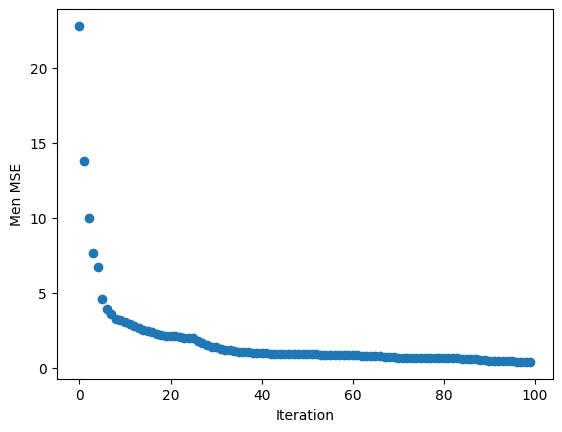

In [191]:
plt.scatter(range(len(avg)), avg)
plt.xlabel('Iteration')
plt.ylabel('Men MSE')

plt.show()